In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')

In [22]:
df.isnull().sum()
#df = df.fillna(0)
df = df.dropna(axis=1, how='all')

In [23]:
# print(df.columns)
# print(len(df.columns))

In [24]:
# one hot encode the categorical variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

dummies = pd.get_dummies(df[['icu_admit_source', 'ethnicity', 'gender', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem', 'icu_stay_type']])
# concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, dummies], axis=1)
# drop the original categorical columns
df.drop(['icu_admit_source', 'ethnicity', 'gender', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem', 'icu_stay_type'], axis=1, inplace=True)
print(df.columns)

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days', 'weight',
       ...
       'apache_2_bodysystem_Metabolic', 'apache_2_bodysystem_Neurologic',
       'apache_2_bodysystem_Renal/Genitourinary',
       'apache_2_bodysystem_Respiratory', 'apache_2_bodysystem_Trauma',
       'apache_2_bodysystem_Undefined Diagnoses',
       'apache_2_bodysystem_Undefined diagnoses', 'icu_stay_type_admit',
       'icu_stay_type_readmit', 'icu_stay_type_transfer'],
      dtype='object', length=122)


In [25]:
# manually drop irrelevant columns
df.drop(['encounter_id', 'patient_id', 'hospital_id', 'icu_id'], axis=1, inplace=True)

print(df.shape)

(91713, 118)


In [26]:
df = df.dropna(axis=0)
print(df.shape)

(57598, 118)


In [27]:
# univariate data analysis

import pandas as pd
import seaborn as sns

# perform univariate analysis
# summary statistics
# print(df.describe())

# # histogram
# df.hist()

# # kernel density plot
# df.plot(kind='density')

# # box plot
# df.plot(kind='box')

In [28]:
# plt.figure(figsize=(20,20))
# sns.heatmap(df.corr(), annot=True, fmt='.0%')
# plt.show()

In [29]:
# correlation and feature removal

import pandas as pd

# Find correlation matrix
corr_matrix = df.corr().abs()
# Set threshold for correlation coefficient
threshold = 0.85

# copy df into dropped_df
dropped_df = df.copy()
# Find features with correlation greater than threshold
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] >= threshold:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            if colname_i not in high_corr_features:
                high_corr_features.add(colname_j)

# Remove highly correlated features from DataFrame
dropped_df.drop(high_corr_features, axis=1, inplace=True)
print(len(dropped_df.columns))

89


In [30]:
# removing outliers using z-score
import pandas as pd
from scipy.stats import zscore

# Calculate z-scores for each feature
z_scores = df.apply(zscore)

# # Identify outliers by setting a threshold for z-score
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# # Remove outliers from DataFrame
df_outliers_removed = df[~outliers]
print(df_outliers_removed.shape)

(14338, 118)


In [31]:
print(df.loc[:,'hospital_death'])

0        0
1        0
5        0
9        0
10       0
        ..
91698    0
91706    0
91708    0
91709    0
91712    0
Name: hospital_death, Length: 57598, dtype: int64


In [32]:
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# set the target variable column name
target_col = 'hospital_death'
y = df[target_col]
X = df.drop([target_col],axis=1)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize the list of selected features
selected_features = []

# create a copy of the training set to keep track of the remaining features
remaining_features = X_train.columns

# iterate over the remaining features and select the one that has the highest F-value
while len(remaining_features) > 0:
    f_values, p_values = f_classif(X_train[remaining_features], y_train)
    best_feature_index = np.argmax(f_values)
    best_feature = remaining_features[best_feature_index]
    
    # add the best feature to the list of selected features and remove it from the remaining features
    selected_features.append(best_feature)
    remaining_features = remaining_features.drop(best_feature)
    
    # print the selected feature and its corresponding F-value
    # print('Selected feature:', best_feature, 'with F-value:', f_values[best_feature_index])

# create a new DataFrame with the selected features
forward_selected_X = X_train[selected_features]

# display the selected features
print('Selected features:', selected_features)
print(forward_selected_X.shape)

c:\Users\kiman\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\kiman\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Selected features: ['gcs_unable_apache', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache', 'ventilated_apache', 'd1_spo2_min', 'd1_temp_min', 'd1_sysbp_min', 'd1_sysbp_noninvasive_min', 'intubated_apache', 'd1_mbp_min', 'd1_mbp_noninvasive_min', 'd1_diasbp_min', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'temp_apache', 'h1_sysbp_min', 'h1_mbp_noninvasive_min', 'h1_sysbp_noninvasive_min', 'h1_mbp_min', 'h1_resprate_max', 'h1_diasbp_noninvasive_min', 'h1_diasbp_min', 'h1_spo2_min', 'heart_rate_apache', 'age', 'd1_resprate_max', 'h1_heartrate_max', 'd1_potassium_max', 'h1_resprate_min', 'apache_3j_bodysystem_Sepsis', 'apache_3j_diagnosis', 'resprate_apache', 'icu_admit_source_Floor', 'apache_2_diagnosis', 'elective_surgery', 'd1_glucose_max', 'h1_heartrate_min', 'apache_3j_bodysystem_Metabolic', 'apache_2_bodysystem_Metabolic', 'icu_admit_source_Operating Room / Recovery', 'apache_post_operative', 'apache_2_bodys

Include PCA

Explained variance ratio: [0.86518872 0.03499515]
Transformed data: [[ -50.529862     11.82657416]
 [-349.32004571   -7.01126153]
 [-137.0845848   -48.46248468]
 ...
 [ -50.26791129  245.39309594]
 [ -51.08196394   30.92508905]
 [ 870.34220776  -26.26006674]]


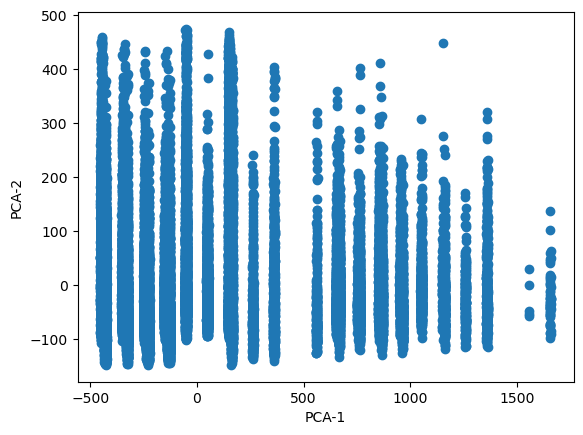

In [33]:
from sklearn.decomposition import PCA
import numpy as np

# Instantiate a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(X_train, y_train)

# Transform the data to the new coordinate system
X_transformed = pca.transform(X)

# Print the explained variance ratio of each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the transformed data
print("Transformed data:", X_transformed)

pca1, pca2 = np.array(X_transformed).T

fig1 = plt.figure("Figure 1")
plt.scatter(pca1,pca2)
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.show()


# Modeling

- Random forest
- XGBoost
- Catboost 
- Decision Trees
- Stacking 


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss, f1_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.calibration import CalibrationDisplay

def grid_search(model, params, model_name):
    # define your GridSearchCV object with the relevant parameters
    print("For Model: ", model_name)
    gscv = HalvingGridSearchCV(model, params, cv=5)

    # fit the grid search model with the train data and print the best parameters
    gscv.fit(X_train, y_train)
    print("Best parameters:\n", gscv.best_params_)

    # use the fitted model with the best parameters to predict on the test set and report the metrics
    y_pred = gscv.predict(X_test)

    logl = log_loss(y_test, y_pred)
    accs = accuracy_score(y_test, y_pred)
    model_y_prob = gscv.predict_proba(X_test)
    ras = roc_auc_score(y_test, model_y_prob[:, 1])
    f1 = f1_score(y_test, y_pred)
    
    print("Log Loss: ", logl)
    print("F1 Score: ", f1)
    print("Accuracy Score: ", accs)
    print("ROC-AUC score: ", ras)

    print("\nROC CURVE")
    RocCurveDisplay.from_estimator(gscv, X_test, y_test)
    plt.show()

    print("\nCONFUSION MATRIX")
    ConfusionMatrixDisplay.from_estimator(gscv, X_test, y_test)
    plt.show()

    print("\nPR CURVE")
    PrecisionRecallDisplay.from_estimator(gscv, X_test, y_test)
    plt.show()

    print("\nCALIBRATION DISPLAY")
    CalibrationDisplay.from_estimator(gscv, X_test, y_test)
    plt.show()

For Model:  Logistic Regression


c:\Users\kiman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kiman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best parameters:
 {'class_weight': None, 'fit_intercept': True, 'random_state': 42}
Log Loss:  2.7373271176574865
F1 Score:  0.33792603335750543
Accuracy Score:  0.9207465277777778
ROC-AUC score:  0.8556217148010848

ROC CURVE


c:\Users\kiman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


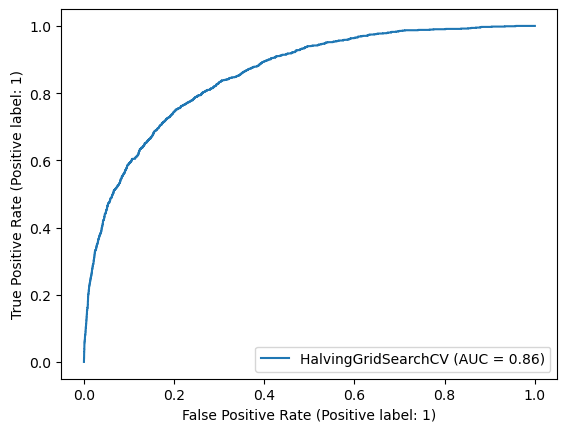


CONFUSION MATRIX


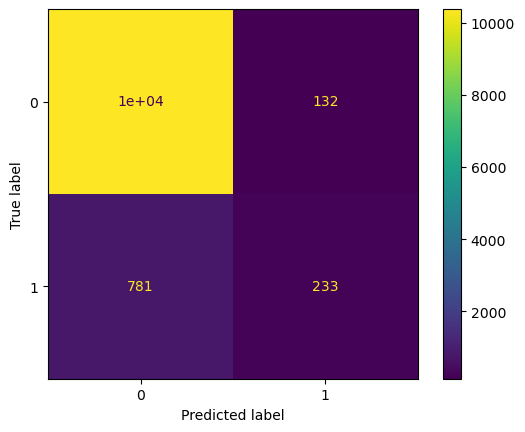


PR CURVE


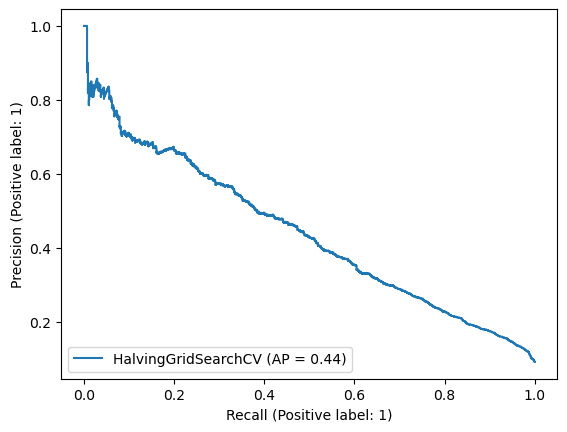


CALIBRATION DISPLAY


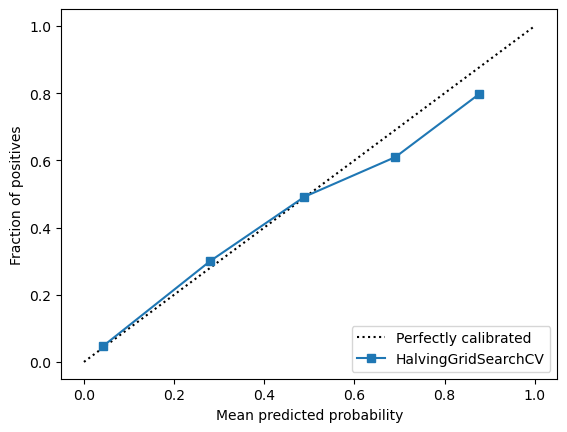

In [35]:
lr_params = {'fit_intercept': [True, False], 'class_weight': [None, 'balanced'], 'random_state': [42,]}
grid_search(LogisticRegression(max_iter=1000), lr_params, "Logistic Regression")


In [36]:
log = LogisticRegression(max_iter=1000, fit_intercept=True, class_weight='balanced', random_state=42)

log.fit(X_train, y_train)

c:\Users\kiman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [40]:
#training logistic regression using SMOTE for imbalanced classes
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42) 
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel()) 
log = LogisticRegression(max_iter=1000, fit_intercept=False, class_weight='balanced', random_state=42)

#this is strangely bad; still testing
log.fit(X_train_sm, y_train_sm)


c:\Users\kiman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', fit_intercept=False, max_iter=1000,
                   random_state=42)

Log Loss:  4.419352223332262
F1 Score:  0.41228070175438597
Accuracy Score:  0.8720486111111111
ROC-AUC score:  0.8264270703206696

ROC CURVE


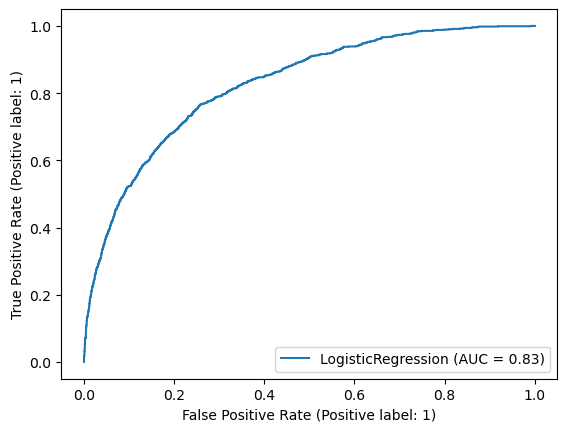


CONFUSION MATRIX


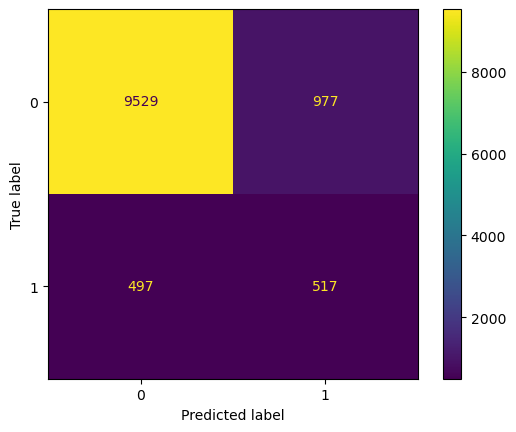


PR CURVE


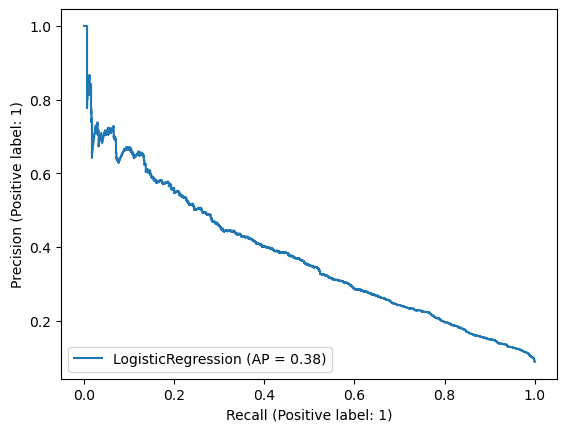


CALIBRATION DISPLAY


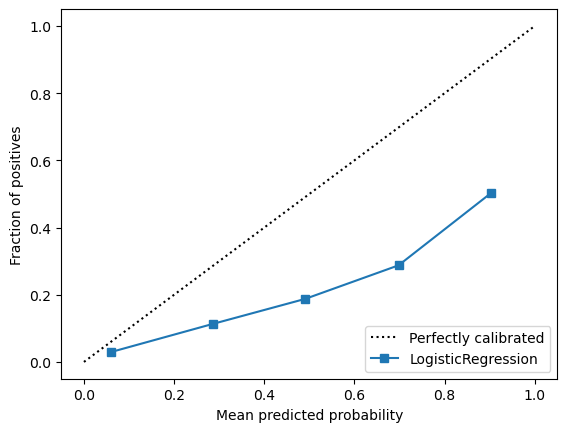

In [41]:
# Code to print out results.
# Includes log loss, f1 score, accuracy score, andROC AUC score.
# Also includes graphs for ROC Curve, PR Curve, Calibration Display, and Confusion Matrix
y_pred = log.predict(X_test)
logl = log_loss(y_test, y_pred)
accs = accuracy_score(y_test, y_pred)
y_prob = log.predict_proba(X_test)
ras = roc_auc_score(y_test, y_prob[:, 1])
cm = confusion_matrix(y_test, y_pred)
accs = accuracy_score(y_test, y_pred)
ras = roc_auc_score(y_test, y_prob[:, 1])
f1 = f1_score(y_test, y_pred)

print("Log Loss: ", logl)
print("F1 Score: ", f1)
print("Accuracy Score: ", accs)
print("ROC-AUC score: ", ras)

print("\nROC CURVE")
RocCurveDisplay.from_estimator(log, X_test, y_test)
plt.show()

print("\nCONFUSION MATRIX")
ConfusionMatrixDisplay.from_estimator(log, X_test, y_test)
plt.show()

print("\nPR CURVE")
PrecisionRecallDisplay.from_estimator(log, X_test, y_test)
plt.show()

print("\nCALIBRATION DISPLAY")
CalibrationDisplay.from_estimator(log, X_test, y_test)
plt.show()
